In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


main_df = pd.read_csv("raw\\application_data_cleaned_v1.csv")
main_df.isnull().sum()
main_df.dropna(axis=0,inplace=True)


In [2]:
main_df['AMT_INCOME_TOTAL'].min()
main_df_NO_outlier = main_df[(np.abs(stats.zscore(main_df["AMT_INCOME_TOTAL"])) < 3)]
print(main_df_NO_outlier["AMT_INCOME_TOTAL"].max())
print(main_df_NO_outlier["AMT_INCOME_TOTAL"].min())
# max income is 117000000.0, min 25650.0
bins_income = [0,50000,100000,150000,200000,400000,800000,1600000,3200000]
main_df_NO_outlier['AMT_INCOME_TOTAL_bin'] = pd.cut(main_df_NO_outlier['AMT_INCOME_TOTAL'], bins_income)
df_dfaulters = main_df_NO_outlier[main_df_NO_outlier['TARGET']==1]
df_normal = main_df_NO_outlier[main_df_NO_outlier['TARGET']==0]

1170000.0
25650.0


C:\Users\zw\AppData\Local\Temp\ipykernel_12472\4062789617.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df_NO_outlier['AMT_INCOME_TOTAL_bin'] = pd.cut(main_df_NO_outlier['AMT_INCOME_TOTAL'], bins_income)


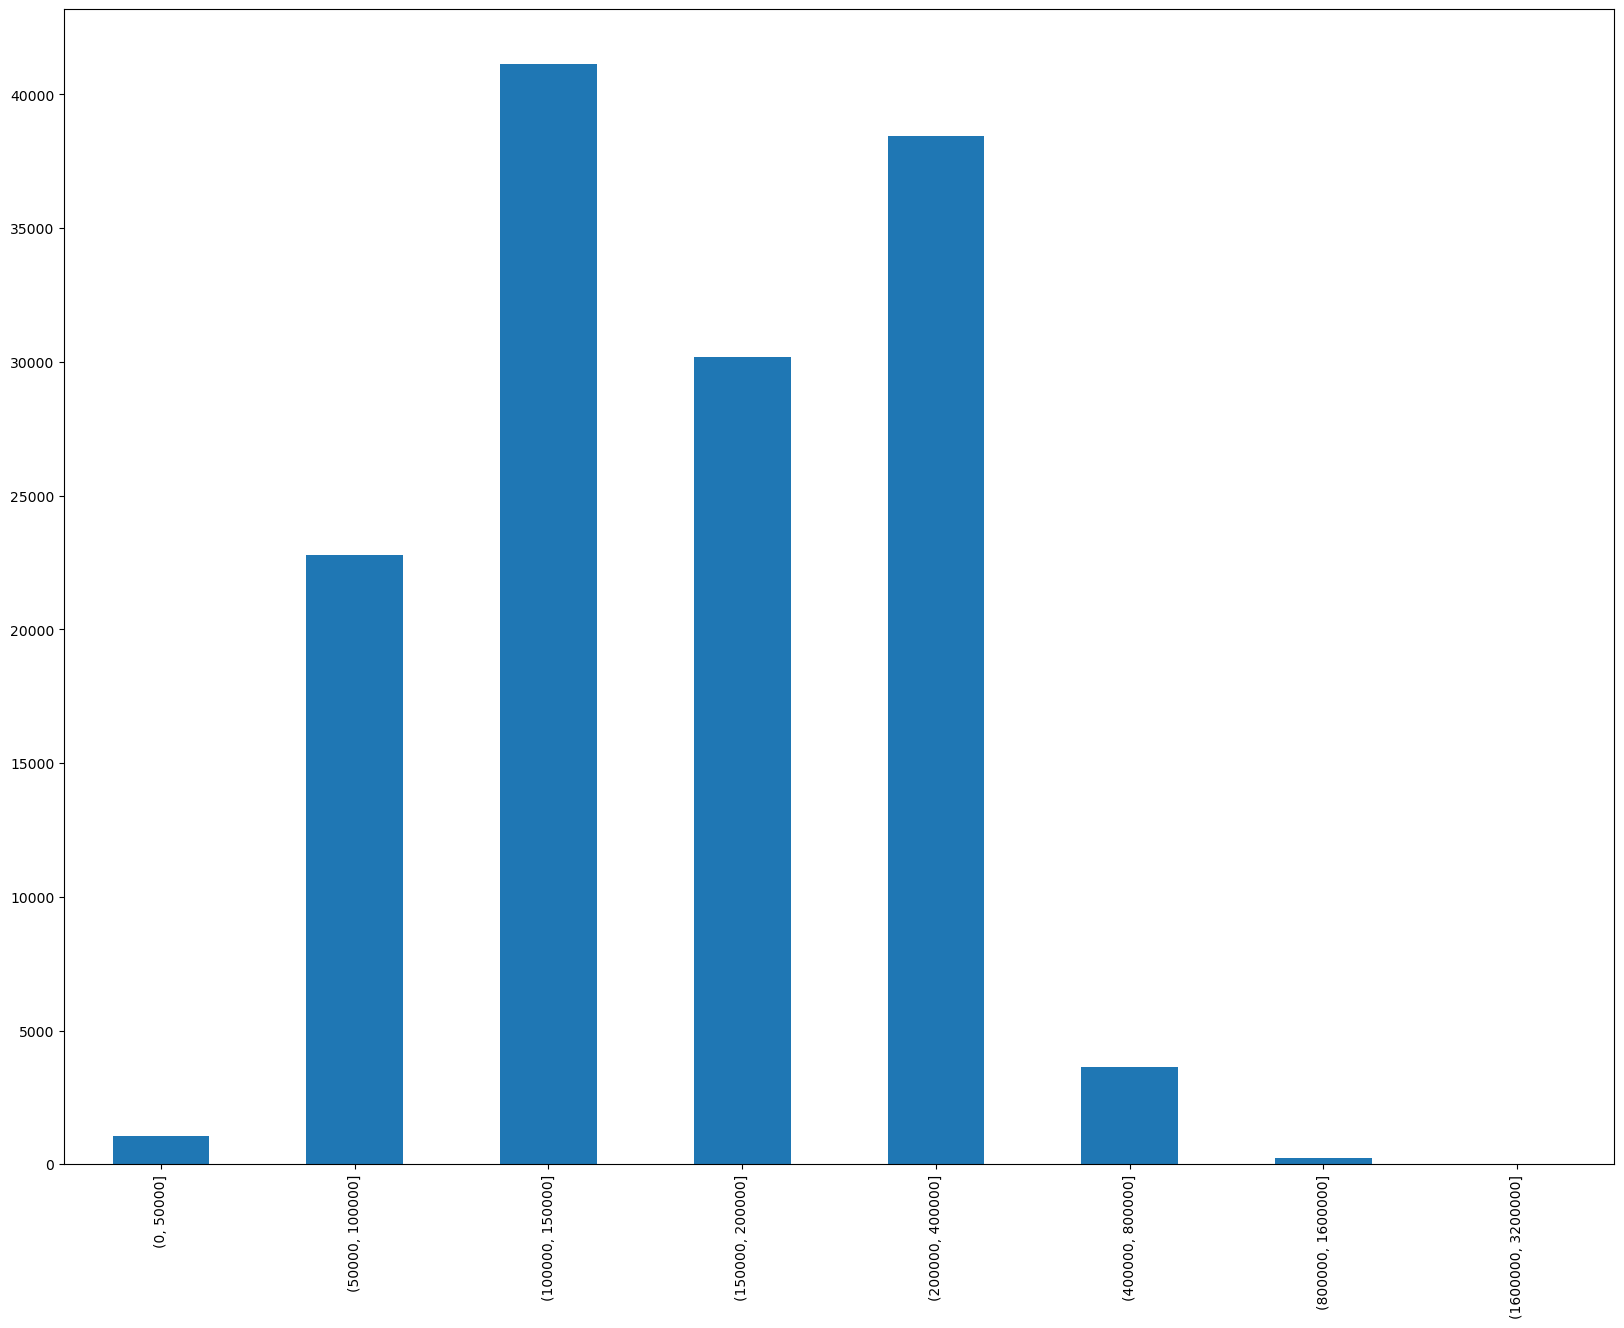

In [4]:
fig_income_all = main_df_NO_outlier['AMT_INCOME_TOTAL_bin'].value_counts().sort_index().plot.bar(figsize = (20,15))
plt.savefig('figures\\fig_income_all.png')


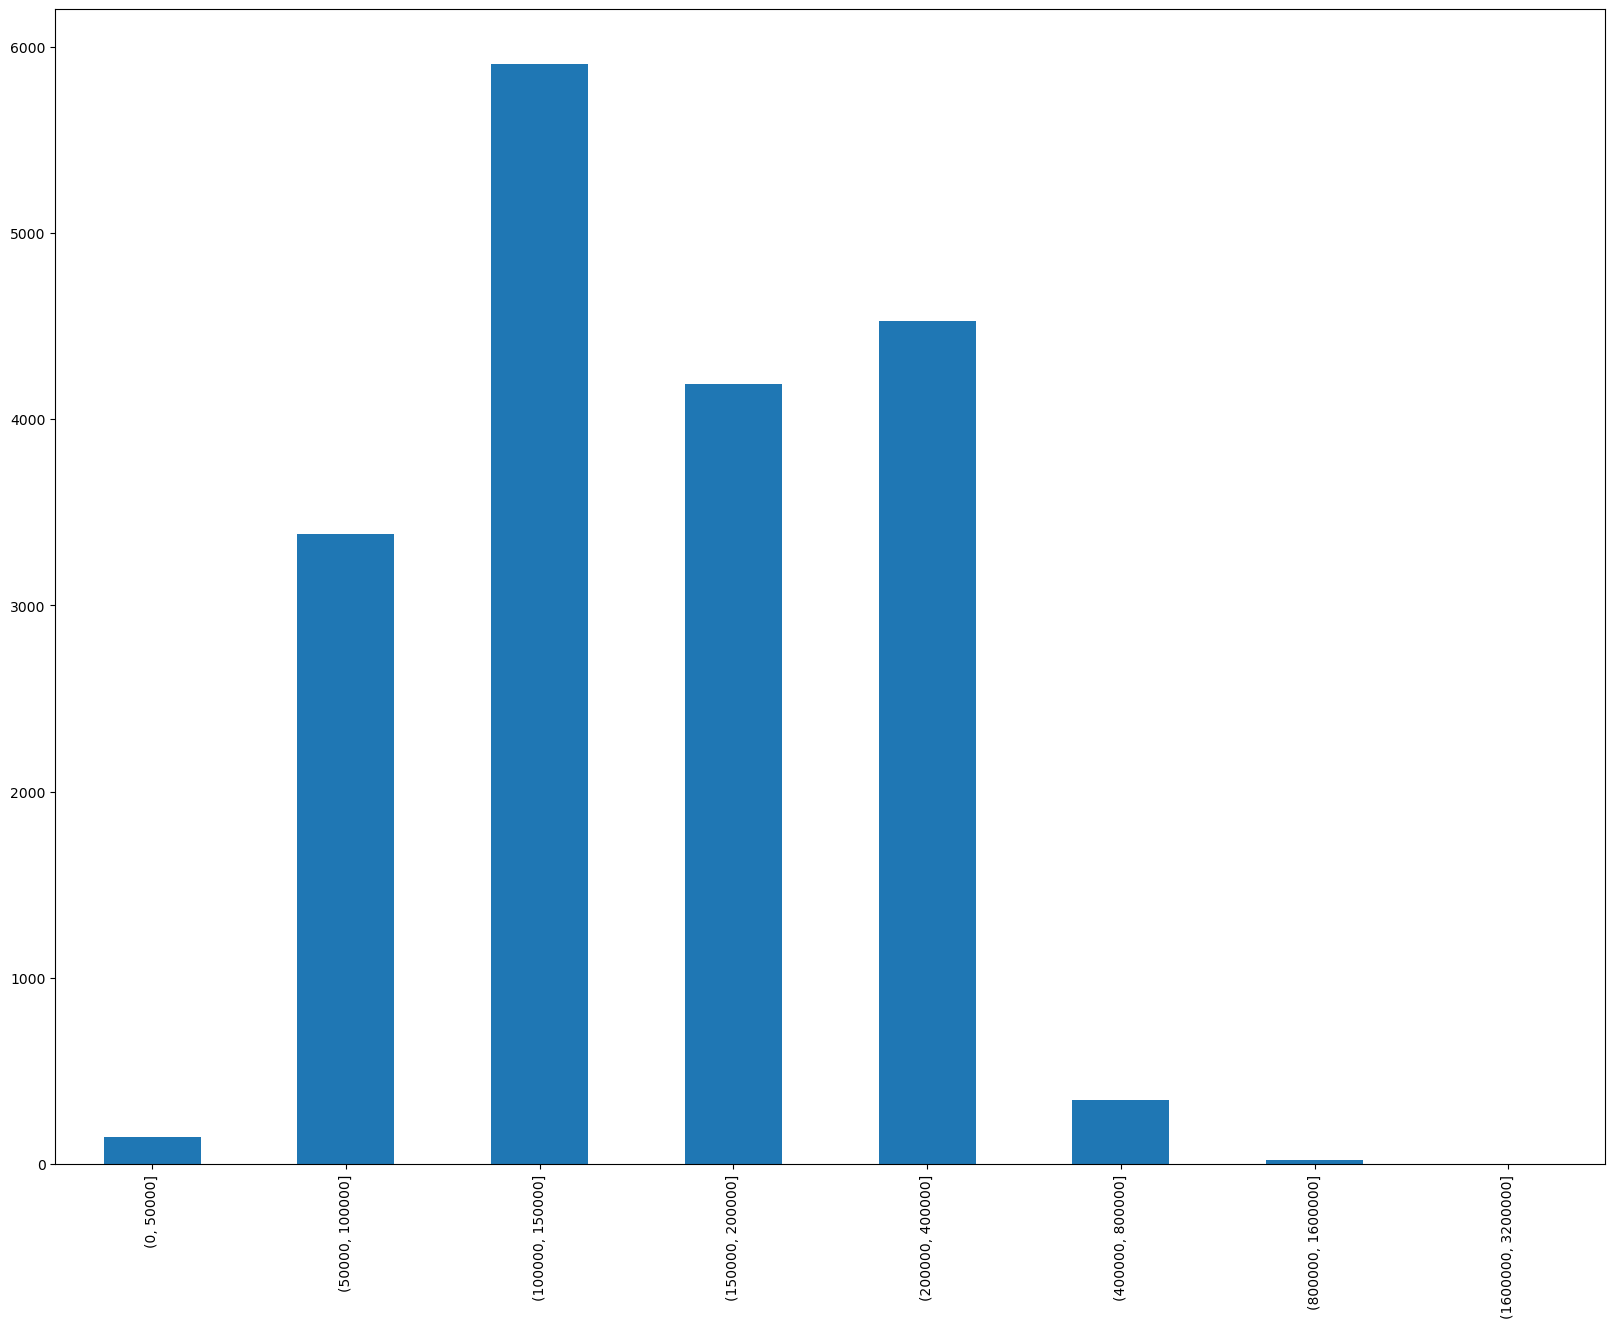

In [5]:
fig_income_defaulters = df_dfaulters['AMT_INCOME_TOTAL_bin'].value_counts().sort_index().plot.bar(figsize = (20,15))
plt.savefig('figures\\fig_income_def.png')


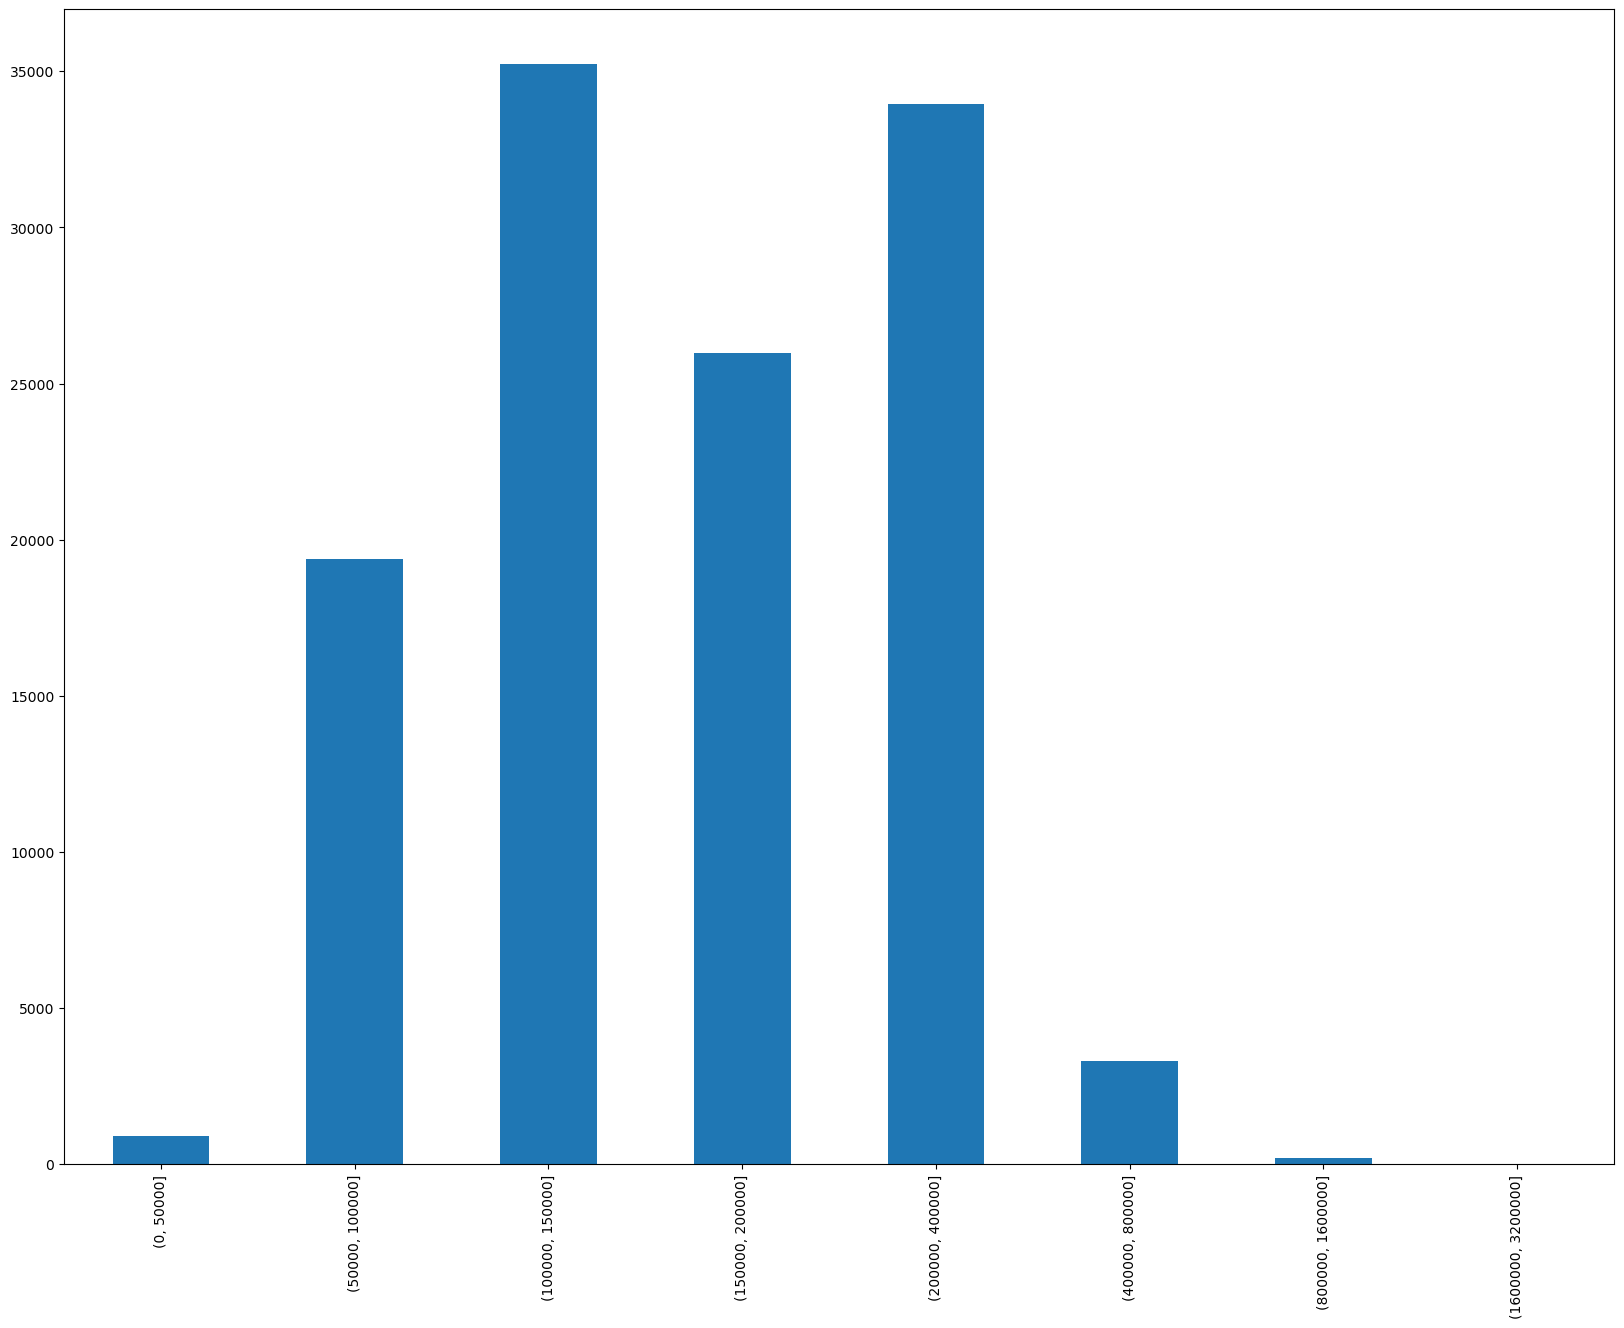

In [6]:
fig_income_normal = df_normal['AMT_INCOME_TOTAL_bin'].value_counts().sort_index().plot.bar(figsize = (20,15))
plt.savefig('figures\\fig_income_nor.png')

There is slightly more defaulters in lower income brackets. 

0.3837679708648895


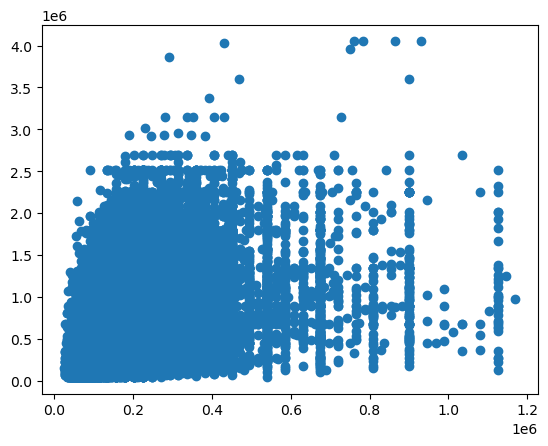

In [9]:
#income_df = main_df[['AMT_CREDIT',"AMT_INCOME_TOTAL"]]
#income_df = income_df[(np.abs(stats.zscore(income_df["AMT_INCOME_TOTAL"])) < 3)]
#fig_icvomeVScredit = plt.scatter(income_df["AMT_INCOME_TOTAL"],income_df["AMT_CREDIT"])
fig_icvomeVScredit = plt.scatter(main_df_NO_outlier["AMT_INCOME_TOTAL"],main_df_NO_outlier["AMT_CREDIT"])
slope, intercept, r, p, std_err = stats.linregress(main_df_NO_outlier["AMT_INCOME_TOTAL"], main_df_NO_outlier["AMT_CREDIT"])
print(r)
fig_icvomeVScredit

Positive coorelation between income and credit. 